## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
n_estimators = [5, 20,100]
for i,x in zip(n_estimators, range(0,len(n_estimators))):
    globals()['clf_%s' % x] = RandomForestClassifier(n_estimators= i , max_depth=4)


# 訓練模型
for x in range(0,len(n_estimators)):
    globals()['clf_%s' % x].fit(x_train, y_train)

# 預測測試集
for x in range(0,len(n_estimators)):
    globals()['y_pred_%s' % x] = globals()['clf_%s' % x].predict(x_test)

In [3]:
for x in range(0,len(n_estimators)):
    globals()['acc_%s' % x]= metrics.accuracy_score(y_test, globals()['y_pred_%s' % x])
    print(globals()['acc_%s' % x])
# acc = metrics.accuracy_score(y_test, y_pred)
# print("Accuracy: ", acc)

0.9736842105263158
0.9473684210526315
0.9736842105263158


In [4]:
import matplotlib.pyplot as plt
plt.plot([globals()['acc_%s' % x] for x in range(0,len(n_estimators))])
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

From the above plot we can summarize that number of estimators doesn't have the effect within range 5 to 200 for this case.

# Regression dataset

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
wine =datasets.load_wine()
x_train , x_test , y_train , y_test = train_test_split(wine.data , wine.target ,  test_size=0.25, random_state=1)

In [7]:
# 建立模型
clf = RandomForestRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

C:\Users\KeshiaLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
acc = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", acc)

MSE:  0.04488888888888889


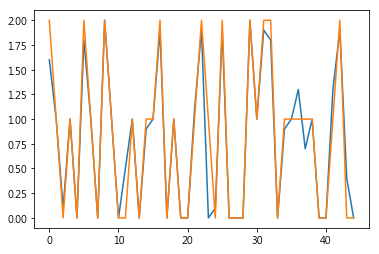

In [9]:
import matplotlib.pyplot as plt
x = [i for i in range(1 , len(y_pred)+1)]
plt.plot(y_pred)
plt.plot(y_test)
plt.show()